In [1]:
from utils_hasse import *

# Import train and test sets

In [2]:
X_train, X_test, y_train, y_test = load_and_handle_train(split_before_handle = True)

C:\ntnuProjects\TDT4173-ML\hasse-testsite\utils_hasse.py:92: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[feature] = le.fit_transform(data[feature])
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(
C:\ntnuProjects\TDT4173-ML\hasse-testsite\utils_hasse.py:95: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/

In [3]:
test = load_and_handle_test()

# Feature importance using Catboost

In [4]:
from sklearn.model_selection import train_test_split, KFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from scipy import stats

import lightgbm as lgb
from catboost import CatBoostRegressor



In [17]:
catboost = CatBoostRegressor(
    n_estimators=500,
    learning_rate=0.1,
    thread_count=-1,
    depth=7,
    silent=True,
    random_seed=42,
    bagging_temperature=0.2
#     od_type="Iter"
)

In [6]:
catboost.fit(X_train, y_train)

In [7]:
cat_prediction = catboost.predict(X_test)

In [8]:
cat_mse = root_mean_squared_log_error(cat_prediction, y_test)
print('Catboost MSE:', cat_mse)

Catboost MSE: 0.2263792791606827


Text(0, 0.5, 'Ground Truth')

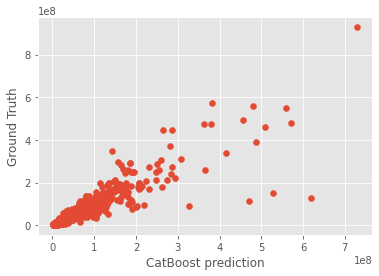

In [9]:
plt.scatter(cat_prediction, y_test)
plt.xlabel('CatBoost prediction')
plt.ylabel('Ground Truth')

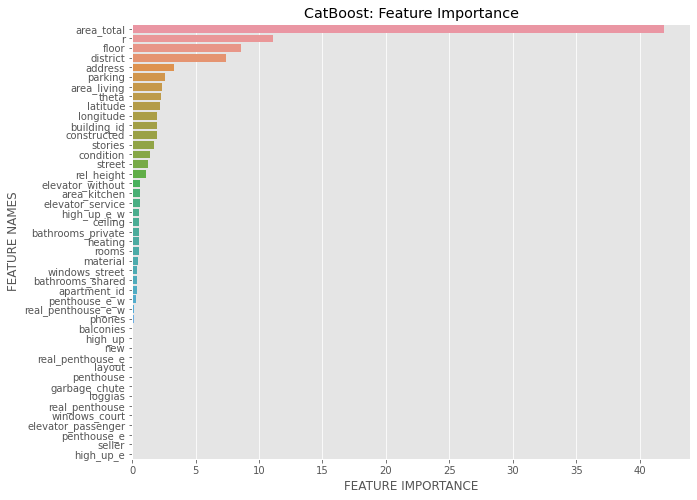

In [10]:
catboost_importance = catboost.get_feature_importance()
plot_feature_importance(catboost_importance, list(X_train.columns), 'CatBoost All Features: ')

# Select 5 features from catboost importance

In [11]:
selected_features = ['area_total','r','floor','district','parking']

In [12]:
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

## Catboost

In [18]:
catboost.fit(X_train_selected, y_train)

In [27]:
cat_prediction = catboost.predict(X_test[selected_features])
cat_mse = root_mean_squared_log_error(cat_prediction, y_test)
print('Catboost MSE:', cat_mse)

Catboost MSE: 0.2506950121943363


Text(0, 0.5, 'Ground Truth')

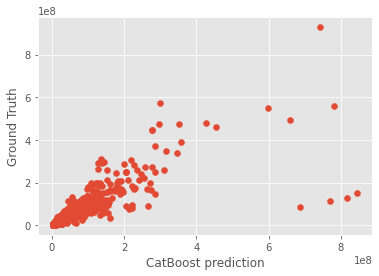

In [28]:
plt.scatter(cat_prediction, y_test)
plt.xlabel('CatBoost prediction')
plt.ylabel('Ground Truth')

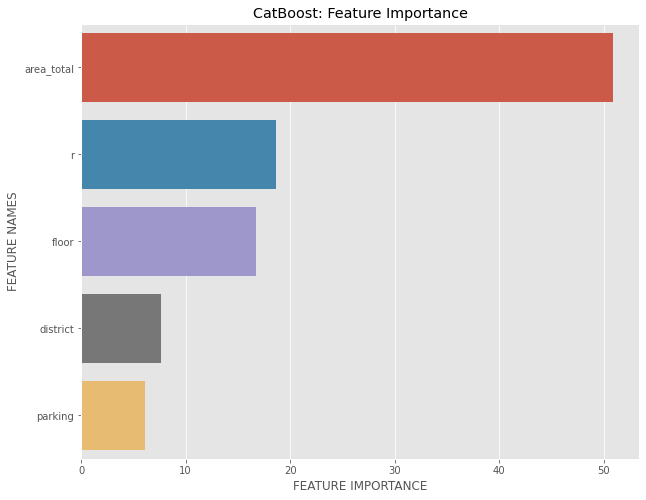

In [29]:
catboost_importance = catboost.get_feature_importance()
plot_feature_importance(catboost_importance, list(X_train_selected.columns), 'CatBoost Selected Features: ')

## LightGBM

### All features

In [23]:
light_gbm = lgb.LGBMRegressor(
    num_leaves=10,
    max_depth=5, 
    random_state=42, 
    silent=True, 
    metric='mse',
    n_jobs=4, 
    n_estimators=2000,
    colsample_bytree=0.95,
    subsample=0.9,
    learning_rate=0.05
)

In [35]:
light_gbm.fit(X_train, y_train)

LGBMRegressor(colsample_bytree=0.95, learning_rate=0.05, max_depth=5,
              metric='mse', n_estimators=2000, n_jobs=4, num_leaves=10,
              random_state=42, subsample=0.9)

LGBM MSE: 0.24700707063041152


Text(0, 0.5, 'Ground Truth')

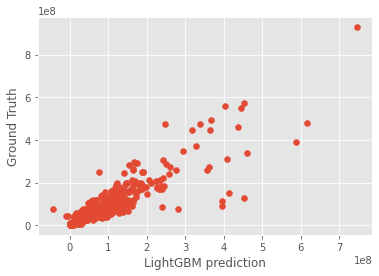

In [36]:
lgbm_prediction = light_gbm.predict(X_test)
lgb_mse = root_mean_squared_log_error(np.abs(y_test), np.abs(lgbm_prediction))
print('LGBM MSE:', lgb_mse)
plt.scatter(lgbm_prediction, y_test)
plt.xlabel('LightGBM prediction')
plt.ylabel('Ground Truth')

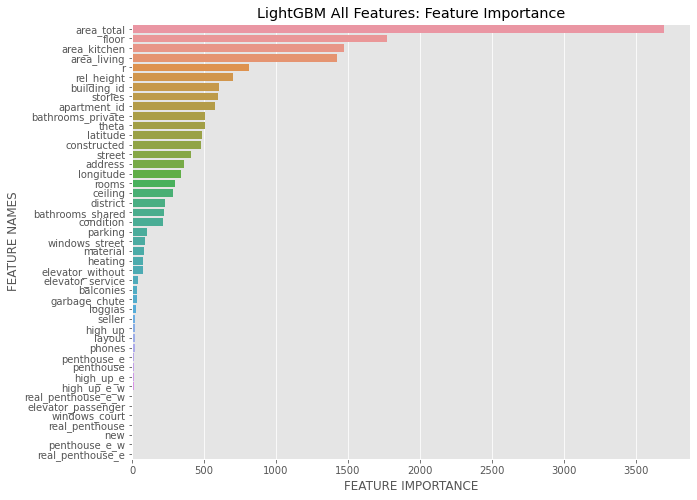

In [37]:
lgbm_importances = light_gbm.feature_importances_
plot_feature_importance(lgbm_importances, list(X_train.columns), 'LightGBM All Features: ')

### Selected features

In [40]:
light_gbm.fit(X_train_selected, y_train)

LGBMRegressor(colsample_bytree=0.95, learning_rate=0.05, max_depth=5,
              metric='mse', n_estimators=2000, n_jobs=4, num_leaves=10,
              random_state=42, subsample=0.9)

LGBM MSE: 0.26469021885462496


Text(0, 0.5, 'Ground Truth')

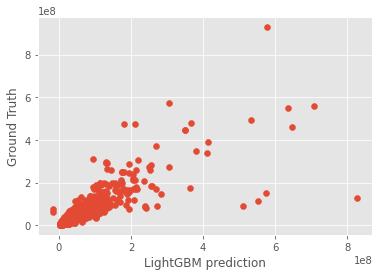

In [41]:
lgbm_prediction = light_gbm.predict(X_test[selected_features])
lgb_mse = root_mean_squared_log_error(np.abs(y_test), np.abs(lgbm_prediction))
print('LGBM MSE:', lgb_mse)
plt.scatter(lgbm_prediction, y_test)
plt.xlabel('LightGBM prediction')
plt.ylabel('Ground Truth')

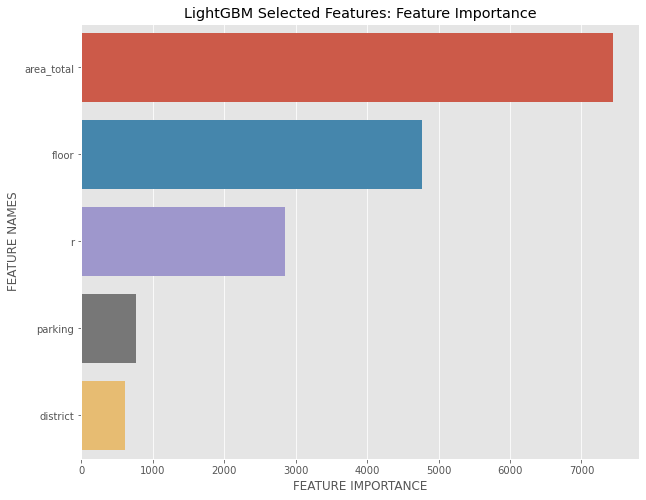

In [42]:
lgbm_importances = light_gbm.feature_importances_
plot_feature_importance(lgbm_importances, list(X_train_selected.columns), 'LightGBM Selected Features: ')

## Gradient Boosting

### All Features

In [43]:
grad_boost_regr = GradientBoostingRegressor(
    learning_rate=0.01,
    n_estimators=2000,
    subsample=1.0, 
    criterion='mse', 
    min_samples_split=4, 
    min_samples_leaf=2, 
    min_weight_fraction_leaf=0.0, 
    max_depth=9, 
    min_impurity_decrease=0.0, 
    init=None, 
    random_state=0, 
    max_features=None,
    alpha=0.9,
    verbose=0,
    max_leaf_nodes=None,
    warm_start=False,
    validation_fraction=0.1,
    n_iter_no_change=None,
    tol=0.0001,
    ccp_alpha=0.0
)

In [44]:
grad_boost_regr.fit(X_train, y_train)

GradientBoostingRegressor(criterion='mse', learning_rate=0.01, max_depth=9,
                          min_samples_leaf=2, min_samples_split=4,
                          n_estimators=2000, random_state=0)

Gradient Boost MSE: 0.18111481031760124


Text(0, 0.5, 'Ground Truth')

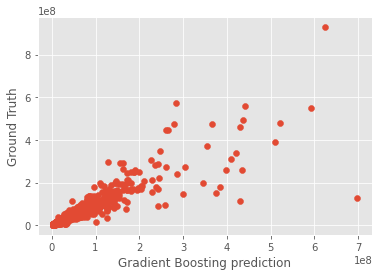

In [45]:
gb_prediction = grad_boost_regr.predict(X_test)
gb_mse = root_mean_squared_log_error(gb_prediction, y_test)
print('Gradient Boost MSE:', gb_mse)
plt.scatter(gb_prediction, y_test)
plt.xlabel('Gradient Boosting prediction')
plt.ylabel('Ground Truth')

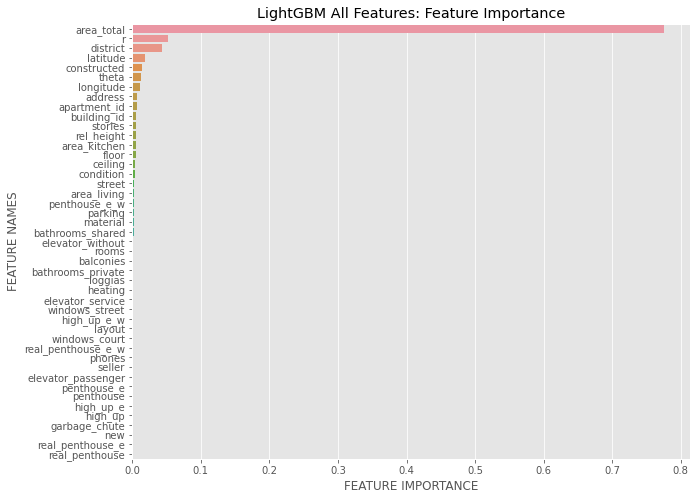

In [46]:
gradient_boost_importances = grad_boost_regr.feature_importances_
plot_feature_importance(gradient_boost_importances, list(X_train.columns), 'Gradient Boost All Features: ')

### Selected Features

In [48]:
grad_boost_regr.fit(X_train_selected, y_train)

GradientBoostingRegressor(criterion='mse', learning_rate=0.01, max_depth=9,
                          min_samples_leaf=2, min_samples_split=4,
                          n_estimators=2000, random_state=0)

Gradient Boost MSE: 0.2598197783068658


Text(0, 0.5, 'Ground Truth')

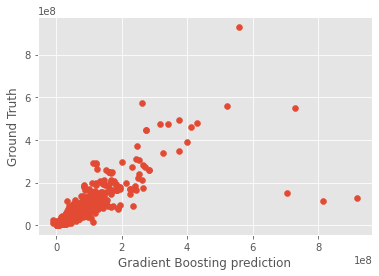

In [50]:
gb_prediction = grad_boost_regr.predict(X_test[selected_features])
gb_mse = root_mean_squared_log_error(abs(gb_prediction), y_test)
print('Gradient Boost MSE:', gb_mse)
plt.scatter(gb_prediction, y_test)
plt.xlabel('Gradient Boosting prediction')
plt.ylabel('Ground Truth')

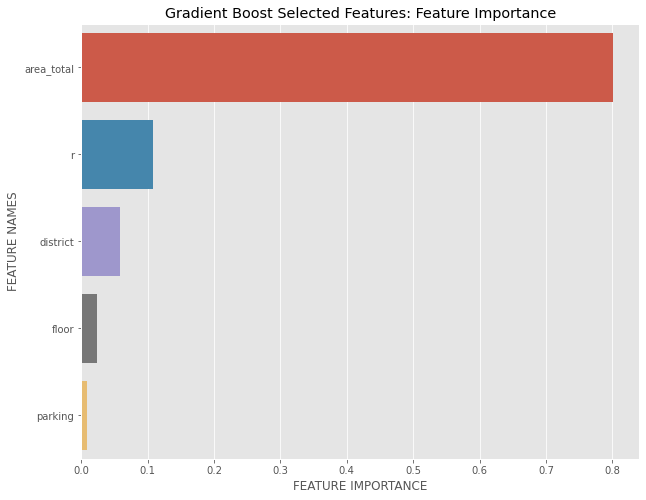

In [52]:
gradient_boost_importances = grad_boost_regr.feature_importances_
plot_feature_importance(gradient_boost_importances, list(X_train_selected.columns), 'Gradient Boost Selected Features: ')

## Adaboost

In [53]:
adaboost = AdaBoostRegressor(
    n_estimators=1500,
    learning_rate=0.05,
    loss='exponential',
    random_state=42
)

### All features

In [ ]:
adaboost.fit(X_train, y_train)

In [ ]:
ada_prediction = adaboost.predict(X_test)
ada_mse = root_mean_squared_log_error(y_test, ada_prediction)
print('Adaboost MSLE:', ada_mse)
plt.scatter(ada_prediction, y_test)
plt.xlabel('Adaboost prediction')
plt.ylabel('Ground Truth')

In [ ]:
adaboost_importances = adaboost.feature_importances_
plot_feature_importance(adaboost_importances, list(X_train.columns), 'Gradient Boost All Features: ')

### Selected Features

In [ ]:
adaboost.fit(X_train_selected, y_train)

In [ ]:
ada_prediction = adaboost.predict(X_test[selected_features])
ada_mse = root_mean_squared_log_error(y_test, ada_prediction)
print('Adaboost MSLE:', ada_mse)
plt.scatter(ada_prediction, y_test)
plt.xlabel('Adaboost prediction')
plt.ylabel('Ground Truth')

In [ ]:
adaboost_importances = adaboost.feature_importances_
plot_feature_importance(adaboost_importances, list(X_train_selected.columns), 'Gradient Boost All Features: ')